Initial cost value for theta values [0. 0. 0. 0. 0. 0. 0. 0.] is: 0.6931471805599464


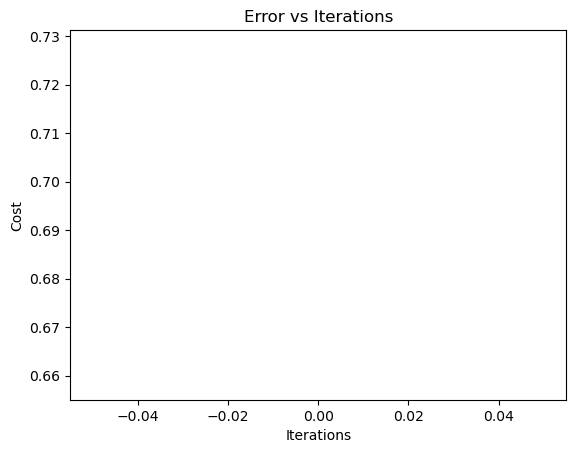

Final cost value for theta values [nan nan nan nan nan nan nan nan] is: nan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return  1 / (1 + np.exp(-z))

def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def logistic_regression(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    for i in range(iters):
        h = sigmoid(np.dot(X, theta))
        cost_num = cost(h, y)
        cost_array[i] = cost_num
        gradient_val = gradient(X, h, y)
        theta = theta - (gradient_val * alpha)
    return theta, cost_array

def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

def run():
    # import data into a pandas dataframe
    data = pd.read_csv('C:/Users/taham/Desktop/7th semester/AI by Sir Ayyaz/Assignments/train.csv')

    # extract data
    X = data[['PassengerId','Survived','Pclass','Fare','Age','SibSp','Parch']]
    y = data['Survived']

    # add 1 column to allow vectorized calculations
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    # Initial theta values
    theta = np.zeros(X.shape[1])

    # define hyperparameters
    alpha = 0.01
    iterations = 10000

    # Starting values
    h = sigmoid(np.dot(X, theta))
    print("Initial cost value for theta values {0} is: {1}".format(theta, cost(h,y)))

    # run logistic regression
    theta, cost_num = logistic_regression(X, y, theta, alpha, iterations)

    # display cost chart
    plotChart(iterations, cost_num)
    
    # final values
    h = sigmoid(np.dot(X, theta))
    print("Final cost value for theta values {0} is: {1}".format(theta, cost(h,y)))

if __name__ == "__main__":
    run()